<a href="https://colab.research.google.com/github/Ohalu909/B1_MLSJ/blob/main/Afifah_Copy_of_%5BParticipants_copy%5D_Intro_to_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**☺️☺️ Please go to 'File' and 'Save a copy in Drive' to create a copy for yourself**

~ created by GDSC Malaysia MLSTUDYJAM 2022 mentors ~

#🌺Welcome to Beginner Group Mentees!!
###**Topic   :** Practical Hand-On In Supervised Learning (ML)
###**Algorithms:** Linear, Lasso, Polynomial, & Random Forest Regression
###**Dataset :**  California Housing



## Overview



## Intro to Google Colabs
*  Colab allows anybody to write and execute arbitrary python code through the browser
*  Well suited for machine learning, data analysis and education.




---



# Steps in Machine Learning Modeling

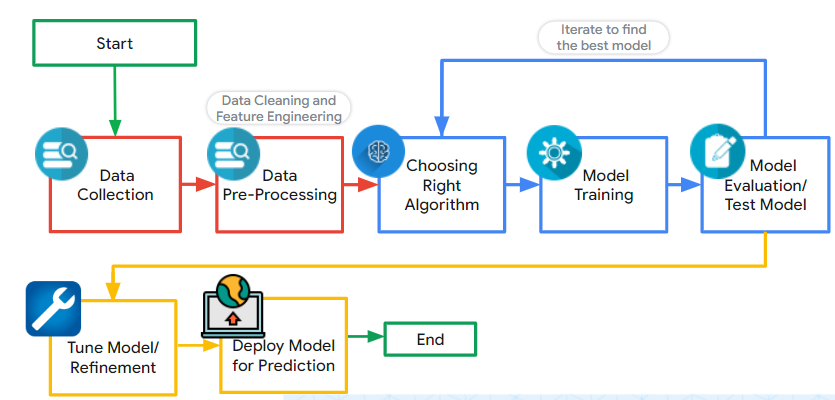

##STEP 1: DATA COLLECTION



###Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing

####Check version

In [22]:
print(sklearn.__version__)

1.0.2


###Import datasets

Let's load California Housing dataset that is ready in the fridge by scikit-learn dataset tool !

* Import a dataframe of attributes
* Import target variable (median house value for California districts)

In [23]:
#return x as dataframe, y as series
x,y= fetch_california_housing(return_X_y=True,as_frame=True)

#convert y to dataframe
y=pd.DataFrame(y) 

##STEP 2: DATA PRE-PROCESSING



###Exploratory data analysis (EDA)
EDA is a set of techniques used to **take insights from the data**. For example,  patterns, relations, and anomalies(outliers) in the data are detected using some **statistical graph** and other **visualization** techniques.

In [24]:
 #to check the shape of the data (rows,columns)
 print(x.shape)
 print(y.shape)

(20640, 8)
(20640, 1)


#### .info()
*   Check the information of the dataset (Column name, Non-Null Count, Data type),
if the count of non-null for each column are the same, means there is no missing values.
*   If missing value does exist, we have to handle the missing value by either dropping the respective rows, or replace it with mean,mode or median, depends on dataset characteristics. 
*Read more in this [link](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

In [25]:
#check x info
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [26]:
#check y info
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


####.describe()
* Compute the statistical infomation of each columns in the datasets
* Mostly for detecting outliers 

In [27]:
#detect outliers
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


* When looking into the 'AveRooms' column, we can clearly see that there is outliers.
* Mean is 28.64, third quatile is 37, but the max is 141, which is much more greater
* Using a box plot and histogram can help us analyse more about the data

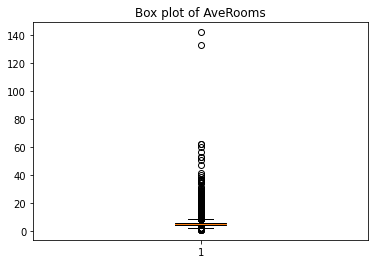

In [28]:
plt.boxplot(x['AveRooms']) 
plt.title('Box plot of AveRooms')
plt.show()

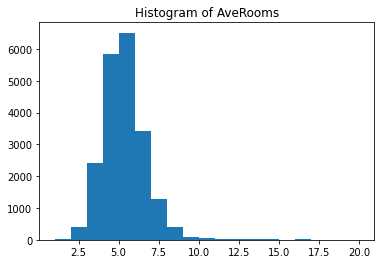

In [29]:
plt.hist(x['AveRooms'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Histogram of AveRooms')
plt.show()

* Based on the box plot and histogram plotted, we can see that the data is mainly around 2 to 15, thus it's reasonable to remove the data >15
* Always, check the number of suspected outliers first, remove it if the number is small 

In [30]:
#check the number of outliers 
print((x['AveRooms']>15).sum())

109


In [31]:
#print out the list where it's the index of outliers
list_1=x[(x['AveRooms'] >15)].index 

#drop by specifying the index number in the dataframe, inplace=True is to ensure the changes is made in the same dataframe
x.drop(list_1, inplace=True)

#same goes to y
y.drop(list_1, inplace=True)

#check again the dataframe
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,3.871476,28.698894,5.311394,1.072709,1431.106619,3.073527,35.622028,-119.570997
std,1.900095,12.578158,1.318969,0.159960,1132.596420,10.413151,2.131467,2.004856
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.562500,18.000000,4.436551,1.005839,792.000000,2.432239,33.930000,-121.800000
50%,3.535200,29.000000,5.221884,1.048265,1170.000000,2.822018,34.250000,-118.490000
75%,4.745650,37.000000,6.034123,1.098422,1728.000000,3.284204,37.710000,-118.010000
max,15.000100,52.000000,14.851852,3.716418,35682.000000,1243.333333,41.950000,-114.310000


* We can noticed not only the AveRooms become normal, the AveBedrms as well also cleaned 
* But, Population and OveOccup are still having outliers

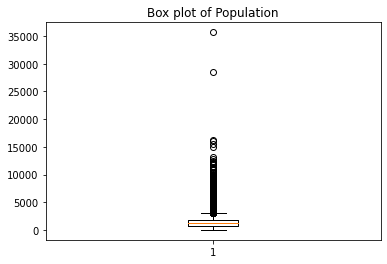

In [32]:
#Box plot
plt.boxplot(x['Population']) 
plt.title('Box plot of Population')
plt.show()

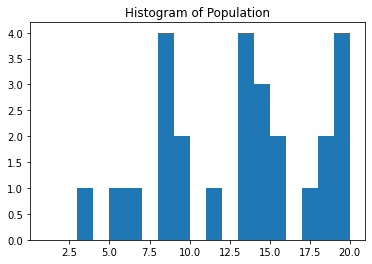

In [34]:
#Histogram
plt.hist(x['Population'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Histogram of Population')
plt.show()

* Based on the box plot and histogram plotted, we can see that the data is mainly around 0 to 7000, thus it's reasonable to remove the data >7000
* Again, check the number of suspected outliers first, remove it if the number is small 

In [36]:
#Check number of outliers
print((x['Population']>7000).sum())

122


In [37]:
#drop outlier and check the details
#print out the list where it's the index of outliers
list_1=x[(x['Population'] >7000)].index 

#drop by specifying the index number in the dataframe, inplace=True is to ensure the changes is made in the same dataframe
x.drop(list_1, inplace=True)

#same goes to y
y.drop(list_1, inplace=True)

#check again the dataframe
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000,20409.000000
mean,3.867033,28.803126,5.308613,1.072695,1385.132197,3.008151,35.625428,-119.574705
std,1.900710,12.527279,1.318315,0.160330,926.173695,5.777864,2.132376,2.005075
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.562500,18.000000,4.435185,1.005556,790.000000,2.431034,33.930000,-121.810000
50%,3.531300,29.000000,5.219212,1.048165,1166.000000,2.820046,34.250000,-118.490000
75%,4.739000,37.000000,6.026667,1.098330,1715.000000,3.283582,37.710000,-118.010000
max,15.000100,52.000000,14.851852,3.716418,6990.000000,599.714286,41.950000,-114.310000


* It's time for AveOccup

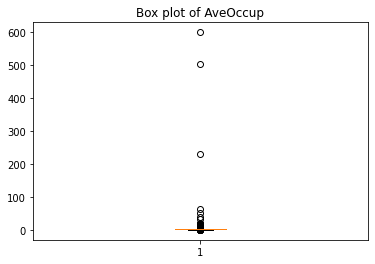

In [38]:
#Box plot
plt.boxplot(x['AveOccup']) 
plt.title('Box plot of AveOccup')
plt.show()

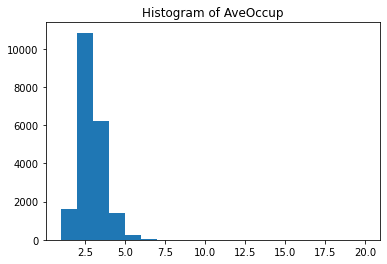

In [39]:
#Histogram  
plt.hist(x['AveOccup'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Histogram of AveOccup')
plt.show()

* Based on the box plot and histogram plotted, we can see that the data is mainly around 1 to 10, thus it's reasonable to remove the data >10
* Check the number of suspected outliers first, remove it if the number is small!!!

In [43]:
#Check number of outliers
print((x['AveOccup']>10).sum())

0


In [44]:
#drop outlier and check the details
#print out the list where it's the index of outliers
list_1=x[(x['AveOccup'] >10)].index 

#drop by specifying the index number in the dataframe, inplace=True is to ensure the changes is made in the same dataframe
x.drop(list_1, inplace=True)

#same goes to y
y.drop(list_1, inplace=True)

#check again the dataframe
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000
mean,3.867270,28.800982,5.308751,1.072616,1383.489816,2.919546,35.624676,-119.574261
std,1.898263,12.523178,1.316206,0.159947,922.837019,0.764506,2.132239,2.004942
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.562500,18.000000,4.435306,1.005587,790.000000,2.430197,33.930000,-121.810000
50%,3.531300,29.000000,5.219512,1.048128,1165.000000,2.818493,34.250000,-118.490000
75%,4.739450,37.000000,6.026222,1.098185,1714.000000,3.281325,37.710000,-118.010000
max,15.000100,52.000000,14.851852,3.716418,6990.000000,9.954545,41.950000,-114.310000


###Splitting the data in to train set and test set 
#### Why need train-test split ?
*   Evaluate how well our machine learning model performs

#### Train Test Splitting ?
*   **Training Set (80%)**: Used to fit the model, the statistics of the train  set are known

     **Test Set (20%)**: A subset used to put the trained model to the test

#### Details:
*  **1). X_train** - This includes your all independent variables,these will be used to train the model

  **2). X_test** - This is remaining portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

  **3). y_train** - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

  **4). y_test** - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.



*  <img src="https://drive.google.com/uc?id=1LVkRnLac0Ks9j-sVFjUYyBvkjRdJmvAi" width=400>





In [45]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
8906   3.5076      39.0  4.080000   1.069333      1074.0  2.864000     34.03   
14567  2.5909      36.0  4.818584   1.061947       623.0  2.756637     32.83   
6734   6.3013      49.0  7.018553   1.074212      1601.0  2.970315     34.12   
14341  3.1979      43.0  3.791557   1.071240       692.0  1.825858     32.74   
17892  3.2153      42.0  4.783383   1.050445      1940.0  2.878338     37.36   
...       ...       ...       ...        ...         ...       ...       ...   
11403  3.9929      14.0  4.571048   1.049734      3171.0  2.816163     33.73   
12116  5.2530       5.0  7.093509   1.051777      4573.0  3.534003     33.96   
5446   4.1083      41.0  4.244565   1.024457       874.0  2.375000     34.00   
863    5.8151       6.0  6.402616   1.042151      2071.0  3.010174     37.58   
16023  5.1238      52.0  6.167076   1.076167      1153.0  2.832924     37.73   

       Longitude  
8906     -118.48  
1

📝**random_state**


*   sets a seed to the random generator so the train-test splits are always deterministic (same)

###Feature Scaling
**Function:**
*   Standardizes features of the data set by scaling to unit variance and removing the mean in the training set.
*   Makes data within same scale (with same level of importance)


**When to Feature Scaling?**

1.   Gradient Descent Based Algorithms

>*   linear regression, logistic regression, neural network

2.   Distance-Based Algorithms

>*   KNN, K-means, and SVM 


**Techniques:**
1. Normalization


>*   bound values within a range (e.g., [0-1])
*   useful in algorithms that do not assume any distribution of the data


2. Standardization


>*   transform data to have 0 mean and a variance of 1 (unitless)
*   does not have a bounding range, and hence, not affected by outliers


<img src="https://drive.google.com/uc?id=1NHWdxw-YAspwhz2AAcWEetGxl3DheqOC" width=400>

In [46]:
# perform Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train=sc.fit_transform(x_train) #fill in the parenthesis 
x_test=sc.transform(x_test)
y_train=sc.fit_transform(y_train)
y_test=sc.transform(y_test)

📝**Standard Scalar**
*   [Read more here (API) ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

<img src="https://drive.google.com/uc?id=1_AxqfD3TQ0K5cBiWRmFkdPIvSpA1OX8j" width=400>



##STEP 3: MODEL TRAINING



###Modelling

Let us talk about some different kind of Machine Learning Models in this section.

What Models are we going to take a look that goes well with California Housing Dataset (continuous output):
- Linear Regression
- Polynomial Regression
- Lasso Regression (Linear L1 Regularisation)
- Random Forest

####Linear Regression

Linear regression was developed in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables, but has been borrowed by machine learning. It is both a statistical algorithm and a machine learning algorithm.


**Let's get Hands-On**

Linear Regression can be imported from SKLEARN package. The documentation of SKLEARN can be accessed through this link below :     

[https://scikit-learn.org/stable/index.html](https://)

Once done importing Linear Regression Model, we should set up a variable that can hold the Model Function. Why is this so ? Because "LinearRegession()" is a very long name to be called everytime we want to use the function for certain functionalities.

So we assign the LinearRegression() function to a variable called "regressor".

Once done with that step, we just need to fit the x_train & y_train data sequence into the model by using ".fit( )" function. 

Then the training process begins.

In [47]:
#Linear regressor
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#fit the data into the model
regressor.fit(x_train, y_train)


LinearRegression()

Once done fitting let us create a variable called "y_pred". 

Then, assign the ",predict()" function into the "y_pred" variable. 

".predict()" is a function, so we cannot call it independently. So, we need the "regressor" variable as it is the invoking factor that carries the LinearRegression() function.

put "x_test" within the ".predict()" function because we want to use the dependent variable to predict the outcome.

In [48]:
#Make prediction
y_pred = regressor.predict(x_test)

After that, we need to find out how does our model performs by using certain evaluation methods.

In this case we are using **R-squared Score** and **Root Mean Squared Error** as our evaluation method to see how our models perform

In [49]:
#Test model performance 
from sklearn.metrics import r2_score,mean_squared_error
linear_score=r2_score(y_test,y_pred)
linear_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(linear_score)
print(linear_rmse)

0.6730085534562653
0.5780001316126417


####Polynomial regression


Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. 

In a simple word, It is a linear model with some modification in order to increase the accuracy.
The dataset used in Polynomial regression for training is of non-linear nature.

That is why you can see the R-Squared Score of Polynomial Regression is higher than Linear Regression.

**Let's get Hands-On**

Import "PolynomialFeatures" from "sklearn.preprocessing".

Create a variable called "poly_reg" and assign the Polynomial function into it.

What is degree in the "PolynomialFeatures( ) ?

- The degree defines the complexity of the model. If you put degree = 1 then, the it is equivalent to a simple linear regression. So, the value of degree should be greater than 1.

you might wonder why are we calling the "regressor" variable without initiating it in a new instance here !

Isn't that used previously on Linear Regression already ?

Yes. You are correct. It is the same "regressor" as LinearRegression(). 

If you see the snippet below. We used ".fit_transform()" to insert the x_train sequence here. 

Well, as mentioned earlier Polynomial Regression is similar to Linear Regression but with extra degree. So, we can use the same variable but use the ".fit_transform()" to match the polynomial features here.

Once transformed, we can fit both x_train and y_train into the model.


**Quick fact**

Why are we just transforming x_train ? 

We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. 

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
regressor.fit(x_poly,y_train)

LinearRegression()

In [51]:
#Make prediction
y_pred=regressor.predict(poly_reg.transform(x_test))

We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

Once done, then we can test the performance of the model.

In [52]:
#Test performance 
import math
from sklearn.metrics import r2_score, mean_squared_error

poly_score = r2_score(y_test, y_pred)
poly_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(poly_score)
print(poly_rmse)


0.7510593592071819
0.5043216851253649


####Lasso regression

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

LASSO Model is a tuning model that comes under L1 Regularization.

Why LASSO is good for Feature Selection ?

Since each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus L1 regularization produces sparse solutions, inherently performing feature selection.

**Let's get Hands-On**

Import Lasso model from sklearn.linear_model package

Create a new instance for "Regressor" variable. Assign it to Lasso Model. 

What is alpha and fit_intercept ?

- Alpha is the penalization rate. The more the alpha value the more aggresive the model will get. 

- fit_intercept is the instance of best fit line. 

fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit.

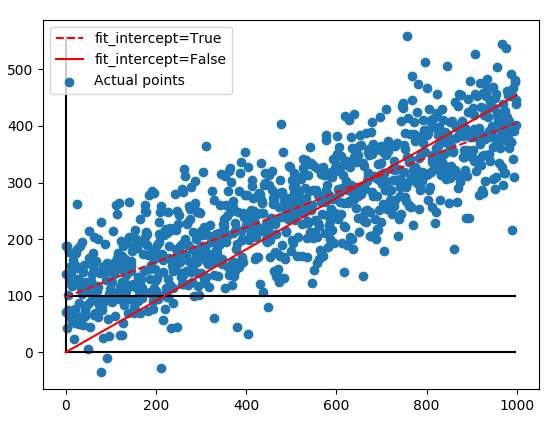

In [53]:
from sklearn.linear_model import Lasso
regressor=Lasso(alpha=0.01,fit_intercept=False) 
regressor.fit(x_train,y_train)

Lasso(alpha=0.01, fit_intercept=False)

Then, we can predict the outcome of this model

In [54]:
y_pred=regressor.predict(x_test)

We can see the accuracy is decent when the alpha=0.01

Maybe this is because we did not treat the outliers earlier instead we just removed according to logical preferences since the deviation of data spread is too far aside for certain values in dataset.



In [55]:
import math
from sklearn.metrics import r2_score,mean_squared_error
lasso_score=r2_score(y_test,y_pred)
lasso_rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print(lasso_score)
print(lasso_rmse)

0.6693229512204586
0.5812483961575612


####Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In simple terms, a collection of decision trees is called Random Forest.

**Let's get Hands-On**

Import Random Forest model from sklearn.ensemble package. 

Create a new instance for the "regressor" variable to hold "RandomForestRegressor( ) function.

What is n_estimators ?

- This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

What is random_state ?

- Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Basically, this a thing that shuffles things up randomly.

Why do we use np.ravel to fit the y_train sequence ?

- Because we want to transform the multi-dimensional array into a 1D array to feed into the model as the outcome variable. In this case, The problem was that the labels were in a column format while it expected it in a row. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=150,random_state=42)
regressor.fit(x_train,np.ravel(y_train))

Once done we can predict the outcome of this model.

In [ ]:
y_pred=regressor.predict(x_test)

We can see the robustness of Random Forest model by the R-squared score. Random Forest is a very robust model for Regression and Classification processes.

In [ ]:
import math
from sklearn.metrics import r2_score,mean_squared_error
randforest_score=r2_score(y_test,y_pred)
randforest_rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print(randforest_score)
print(randforest_rmse)

##STEP 4: MODEL EVALUATION

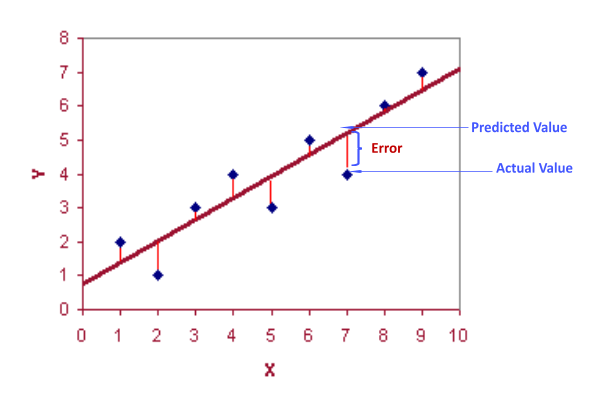

*   how well the model in predicting the output based on the input
*   avoid phenomenon of overfitting and underfitting

<img src="https://drive.google.com/uc?id=1dbvQMXZ2zpc0LK_soWJcex9-E5EfrMSe" width=600>

In [56]:
# Preparing the variables for plotting
x_labels = ["Linear", "Polynomial"]
r2_scores = [linear_score, poly_score]
rmses = [linear_rmse, poly_rmse]
bar_pos = np.arange(len(x_labels)) # Position of the bars at x-axis 

###$R^2$ (R-squared)

- how well the predictor variables can explain the variation in the response variable
- Range: 0 to 1
- The higher the better, indicating stronger correlation (less scatter)

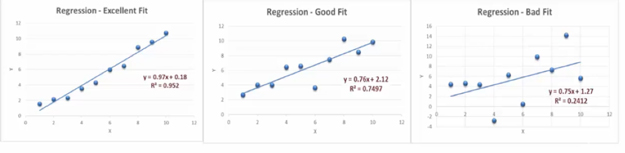

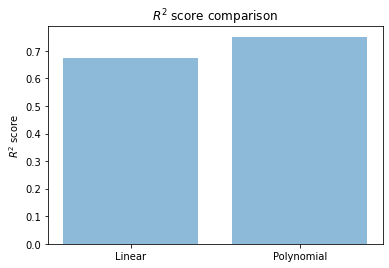

In [57]:
plt.bar(bar_pos, r2_scores, alpha=0.5)
plt.xticks(bar_pos, x_labels)
plt.ylabel("$R^2$ score")
plt.title("$R^2$ score comparison")
plt.show()

###$RMSE$ (Root Mean Squared Error)

- how far apart the predicted values are from the observed values
- Range: 0 to infinity
- The lower the better

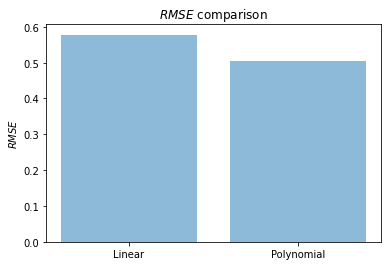

In [58]:
plt.bar(bar_pos, rmses, alpha=0.5)
plt.xticks(bar_pos, x_labels)
plt.ylabel("$RMSE$")
plt.title("$RMSE$ comparison")
plt.show()

###Then which model performs the best among all?
Both RMSE & R-squared tell the same things here...

- RMSE: Polynomial < Linear

- R-squared: Polynomial > Linear